## Selective Search

In [1]:
 !pip install selectivesearch

In [2]:
!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://github.com/chulminkw/DLCV/blob/master/data/image/audrey01.jpg?raw=true 

mkdir: cannot create directory ‘/content/data’: File exists
--2021-08-26 06:28:30--  https://github.com/chulminkw/DLCV/blob/master/data/image/audrey01.jpg?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/image/audrey01.jpg [following]
--2021-08-26 06:28:30--  https://github.com/chulminkw/DLCV/raw/master/data/image/audrey01.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg [following]
--2021-08-26 06:28:30--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuser

In [3]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

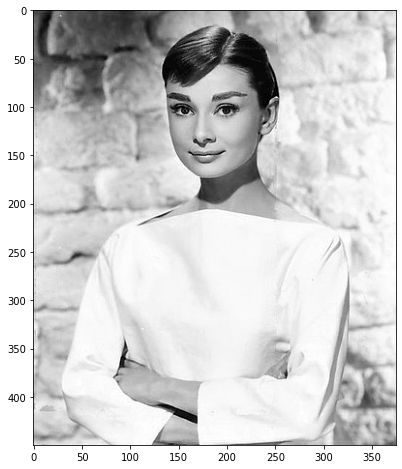

In [4]:
# load image & visualization
img = cv2.imread('/content/data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_rgb)

plt.show()

In [5]:
# 이미지의 Region Proposal 정보를 반환
_,regions = selectivesearch.selective_search(img_rgb,
                                             scale=100,     # scale이 크면 큰 object 위주로
                                             min_size=2000) # 2000 사이즈 이상만 반환

print(f"object가 있을만한 공간의 개수: {len(regions)}")

object가 있을만한 공간의 개수: 41


In [6]:
regions 
# rect: (xmin, ymin, width, height)
# size: object size 

[{'labels': [0.0], 'rect': (0, 0, 107, 167), 'size': 11166},
 {'labels': [1.0], 'rect': (15, 0, 129, 110), 'size': 8771},
 {'labels': [2.0], 'rect': (121, 0, 253, 133), 'size': 17442},
 {'labels': [3.0], 'rect': (134, 17, 73, 62), 'size': 2713},
 {'labels': [4.0], 'rect': (166, 23, 87, 176), 'size': 8639},
 {'labels': [5.0], 'rect': (136, 53, 88, 121), 'size': 4617},
 {'labels': [6.0], 'rect': (232, 79, 117, 147), 'size': 7701},
 {'labels': [7.0], 'rect': (50, 91, 133, 123), 'size': 7042},
 {'labels': [8.0], 'rect': (305, 97, 69, 283), 'size': 11373},
 {'labels': [9.0], 'rect': (0, 161, 70, 46), 'size': 2363},
 {'labels': [10.0], 'rect': (72, 171, 252, 222), 'size': 34467},
 {'labels': [11.0], 'rect': (0, 181, 118, 85), 'size': 5270},
 {'labels': [12.0], 'rect': (106, 210, 89, 101), 'size': 2868},
 {'labels': [13.0], 'rect': (302, 228, 66, 96), 'size': 2531},
 {'labels': [14.0], 'rect': (0, 253, 92, 134), 'size': 7207},
 {'labels': [15.0], 'rect': (153, 270, 173, 179), 'size': 10360},


In [7]:
# rect 정보만 출력
rects = [region['rect'] for region in regions]
rects

[(0, 0, 107, 167),
 (15, 0, 129, 110),
 (121, 0, 253, 133),
 (134, 17, 73, 62),
 (166, 23, 87, 176),
 (136, 53, 88, 121),
 (232, 79, 117, 147),
 (50, 91, 133, 123),
 (305, 97, 69, 283),
 (0, 161, 70, 46),
 (72, 171, 252, 222),
 (0, 181, 118, 85),
 (106, 210, 89, 101),
 (302, 228, 66, 96),
 (0, 253, 92, 134),
 (153, 270, 173, 179),
 (0, 305, 47, 139),
 (104, 312, 80, 71),
 (84, 360, 91, 67),
 (0, 362, 171, 87),
 (297, 364, 77, 85),
 (0, 91, 183, 175),
 (136, 23, 117, 176),
 (72, 171, 254, 278),
 (134, 17, 119, 182),
 (302, 97, 72, 283),
 (121, 0, 253, 226),
 (0, 91, 183, 175),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 253, 92, 191),
 (0, 91, 183, 353),
 (0, 171, 326, 278),
 (0, 97, 374, 352),
 (84, 312, 100, 115),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449)]

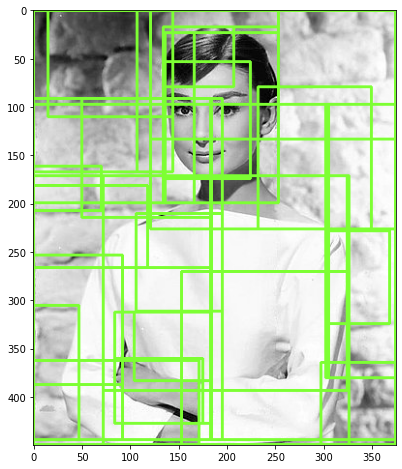

In [8]:
# bounding box를 시각화
green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in rects:

    left = rect[0]
    top = rect[1]
    right = left +  rect[2]
    bottom = top + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, 
                                 (left, top), (right, bottom), # 좌상단, 우하단 
                                 color=green_rgb, # 선의 색
                                 thickness=2) # 선의 굴기

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_rgb_copy)

plt.show()

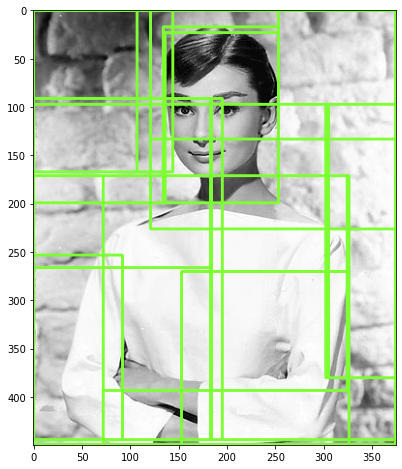

In [9]:
# bounding box의 크기가 큰 후보만 추출
big_rects = [region['rect'] for region in regions if region['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in big_rects:

    left = rect[0]
    top = rect[1]
    right = left +  rect[2]
    bottom = top + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, 
                                 (left, top), (right, bottom), # 좌상단, 우하단 
                                 color=green_rgb, # 선의 색
                                 thickness=2) # 선의 굴기

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_rgb_copy)

plt.show()

## IOU

In [10]:
# IOU 계산  함수
def compute_iou(cand_box, gt_box):

    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])

    intersection = np.maximum(x2-x1, 0)*np.maximum(y2-y1, 0)

    cand_box_area = (cand_box[2] - cand_box[0])*(cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2]-gt_box[0])*(gt_box[3]-gt_box[1])
    union = cand_box_area + gt_box_area - intersection

    iou = intersection / union
    return iou

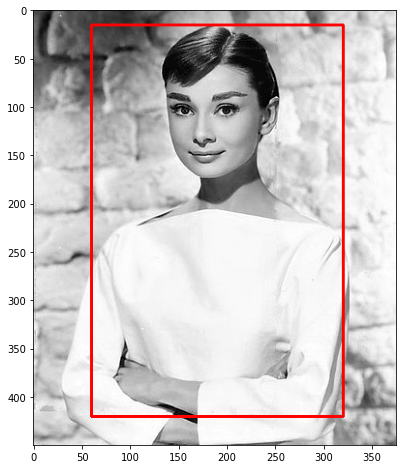

In [11]:
gt_box = [60, 15, 320, 420] # 실제 ground_truth box 의 좌표

img = cv2.imread('/content/data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0 , 0)
img_rgb = cv2.rectangle(img_rgb ,(gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img_rgb)
plt.show()

index: 10, iou: 0.5184766640298338
index: 23, iou: 0.5409250175192712
index: 33, iou: 0.5490037131949166
index: 37, iou: 0.6341234282410753
index: 38, iou: 0.6270619201314865
index: 39, iou: 0.6270619201314865
index: 40, iou: 0.6270619201314865


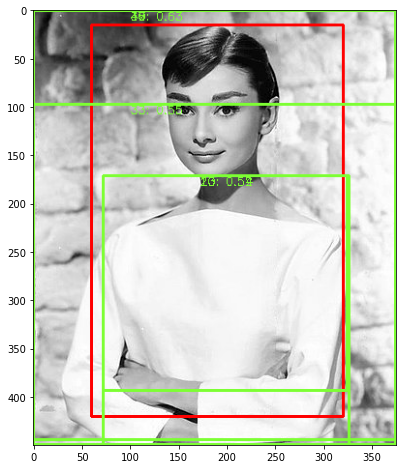

In [12]:
cand_rects = [cand['rect'] for cand in regions]


for idx, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]

    iou =  compute_iou(cand_box, gt_box)

    # IOU가 0.5보다 크면 bounding box 그리기
    if iou > 0.5:
        print(f"index: {idx}, iou: {iou}")

        img_rgb = cv2.rectangle(img_rgb ,(cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=2)
        text = f"{idx}: {iou:.2f}"
        img_rgb = cv2.putText(img_rgb, text ,(cand_box[0]+100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_rgb)
plt.show() 